<a href="https://colab.research.google.com/github/ivangtorre/Curso_CRIDA_2022/blob/main/CRIDA_2022_Ejercicio_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIFAR-100 Classification using Deep Neural Network with Pytorch and with a Fully Connected layer


In [ ]:
# First install Pytorch
!pip install torch
!pip install torchvision

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt


## CIFAR-100 Dataset
he CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).



In [ ]:
train_data = datasets.CIFAR100(root = './data', train = True, transform = transforms.ToTensor(), download = True)
test_data = datasets.CIFAR100(root = './data', train = False, transform = transforms.ToTensor())

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data


In [ ]:
# Define Hyperparameters
batch_size = 100 # the size of input data took for one iteration
input_size = 3072 # img_size = (32,32*3) ---> 3*32*32=3072 in total **** DO NOT MODIFY
hidden_size = 1000 # number of nodes at hidden layer
num_classes = 100 # number of output classes discrete range [0,99] ** DO NOT MODIFY
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
lr = 1e-3 # size of step 

In [ ]:
#Load the data
train_gen = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = False)
test_gen = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

## Visualize the dataset
When we run the code, we will get the greyscale visualization of the MNIST images

cattle


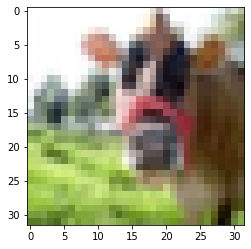

In [ ]:
classes = train_data.classes
image, label = train_data[0] # Visualize the data

print(classes[label])
plt.imshow(image.permute(1, 2, 0))


# DEFINING A NEURAL NETWORK IN PYTORCH
Deep learning uses artificial neural networks (models), which are computing systems that are composed of many layers of interconnected units. By passing data through these interconnected units, a neural network is able to learn how to approximate the computations required to transform inputs into outputs. In PyTorch, neural networks can be constructed using the torch.nn package.

There are two requirements for defining the Net class of your model. The first is writing an __init__ function that references nn.Module. This function is where you define the fully connected layers in your neural network.

When you use PyTorch to build a model, you just have to define the forward function, that will pass the data into the computation graph (i.e. our neural network). This will represent our feed-forward algorithm.



In [ ]:
# Define model class

class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  
  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

Our network is composed of one input layer, a hidden layer, an activatión function and output layer. 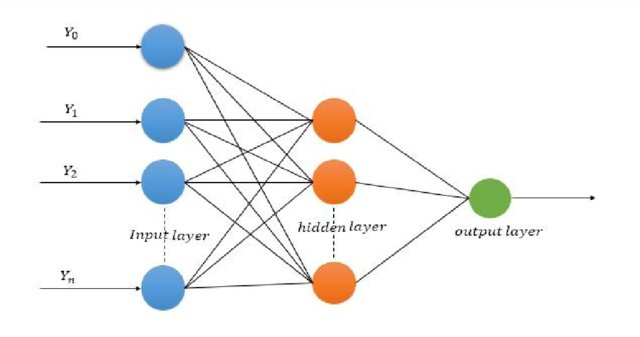

On the following we can visualize the structure of the Deep Neural Network that we have just built.

In [ ]:
# Build the Model
net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=1000, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=1000, out_features=100, bias=True)
)


In [ ]:
#Define loss-function & optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

## Training the model
It is now time to train the model. During training all images will be input into the DNN during one epoch. The objetive is to minimize a loss function (Cross Entropy) between the output and the ground truth. The errors are backpropagated and the optimizer adjust the parameters of the DNN in order to search an optimal solution. Usually the more epochs we train, the better model we will get (although overfitting could happen)

In [ ]:
#Training the model

for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = Variable(images.view(-1,32*32*3)).cuda()
    labels = Variable(labels).cuda()
    
    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()
    
  print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data))

Epoch [1/20], Step [500/500], Loss: 3.8573
Epoch [2/20], Step [500/500], Loss: 3.7274
Epoch [3/20], Step [500/500], Loss: 3.5891
Epoch [4/20], Step [500/500], Loss: 3.4574
Epoch [5/20], Step [500/500], Loss: 3.3901
Epoch [6/20], Step [500/500], Loss: 3.3355
Epoch [7/20], Step [500/500], Loss: 3.3610
Epoch [8/20], Step [500/500], Loss: 3.3047
Epoch [9/20], Step [500/500], Loss: 3.2335
Epoch [10/20], Step [500/500], Loss: 3.1800
Epoch [11/20], Step [500/500], Loss: 3.1415
Epoch [12/20], Step [500/500], Loss: 3.0807
Epoch [13/20], Step [500/500], Loss: 3.0524
Epoch [14/20], Step [500/500], Loss: 3.0635
Epoch [15/20], Step [500/500], Loss: 3.0398
Epoch [16/20], Step [500/500], Loss: 3.0306
Epoch [17/20], Step [500/500], Loss: 2.9746
Epoch [18/20], Step [500/500], Loss: 2.9934
Epoch [19/20], Step [500/500], Loss: 2.9606
Epoch [20/20], Step [500/500], Loss: 2.9640


## Evaluation of the model. 
The model has decreased the loss during the training, but Loss is not a very intuitive metric. We will first evaluate the metric on the training set.

In [ ]:
# Training accuracy 
correct = 0
total = 0
for images,labels in train_gen:
  images = Variable(images.view(-1,32*32*3)).cuda()
  labels = labels.cuda()
  
  output = net(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)

print('Training Accuracy of the model: %.3f %%' %((100*correct)/(total+1)))

Training Accuracy of the model: 28.171 %


## Evaluation on the test set
Check the overfitting!

In [ ]:
#Evaluating the accuracy of the model
correct = 0
total = 0
for images,labels in test_gen:
  images = Variable(images.view(-1,32*32*3)).cuda()
  labels = labels.cuda()
  
  output = net(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)

print('Accuracy of the model: %.3f %%' %((100*correct)/(total+1)))

Accuracy of the model: 21.678 %


## Now is your turn. Some things you can try:

*   Modify the batch size. The batch size is a number of samples processed before the model is updated. 
*   Modify the number of epochs. The number of epochs is the number of complete passes through the training dataset.
*   Modify the learning rate. The learning rate controls how quickly the model is adapted to the problem
*   Try adding new hidden Fully Connected layers and activation functions. Be careful with the size of each layer as they must be consistent. Save the original Neural Network before doing this implementations.



